0.406143418509


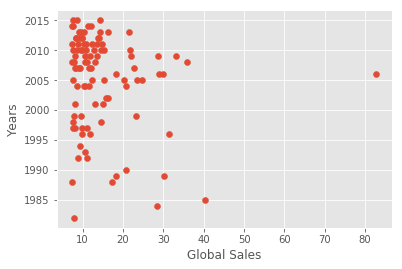

In [55]:
#using linear regression algorithm
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt


data = pd.read_csv('vgsales.csv')
data = (data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Year']]).head(100)
x = np.array(data.drop(['Year'],1))
y = np.array(data['Year'])
#print(x)
#print(y)
#print(data.)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
accuracy = linear.score(x_test,y_test)
print(accuracy)
predictions = linear.predict(x_test)
#For p in range(len(predictions)):
#    print(predictions[p],x_test[p],y_test[p])
plt.scatter(data['Global_Sales'],data['Year'])
plt.xlabel("Global Sales")
plt.ylabel("Years")
plt.show()

In [54]:
#using decision tree algorithm
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('vgsales.csv')
data = data.head(100)
x = np.array(data.drop(['Name','Genre','Platform','Publisher'],axis = 1))
#print(x)
y = np.array(data['Name'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print(accuracy)
#for p in range(len(predictions)):
#    print(predictions[p],x_test[p],y_test[p])



0.0333333333333


In [66]:
#Using KNN Algorithm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('car.data')
le = preprocessing.LabelEncoder()

buying = le.fit_transform(list(data['buying']))
maint = le.fit_transform(list(data['maint']))
door = le.fit_transform(list(data['door']))
persons = le.fit_transform(list(data['persons']))
lug_boot = le.fit_transform(list(data['lug_boot']))
safety = le.fit_transform(list(data['safety']))
cls = le.fit_transform(list(data['class']))

x = list(zip(buying,maint,door,persons,lug_boot,safety))
y = list(cls)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

model = KNeighborsClassifier(n_neighbors = 9)
model.fit(x_train,y_train)
acc = model.score(x_test, y_test)
print(acc)
predicted = model.predict(x_test)
names = ['unacc','acc','good','vgood']
for  p in range(len(predicted)):
    print("Predicted: ",names[predicted[p]],"Data: ",x_test[p],"Actual: ",names[y_test[p]])
    n = model.kneighbors([x_test[p]],9)
    print("N: ",n)

0.924855491329
Predicted:  acc Data:  (1, 1, 2, 1, 0, 2) Actual:  acc
N:  (array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]), array([[ 398, 1045,  588,  236,  578,  915,  946,  713,  691]], dtype=int64))
Predicted:  good Data:  (3, 1, 2, 1, 2, 2) Actual:  good
N:  (array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]), array([[1505,  176, 1139,  131,  934,  722, 1195,  423, 1484]], dtype=int64))
Predicted:  good Data:  (2, 0, 1, 0, 0, 1) Actual:  good
N:  (array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.41421356]]), array([[1453, 1406,  950,  240, 1327, 1376, 1223,  175, 1087]], dtype=int64))
Predicted:  good Data:  (2, 2, 3, 0, 1, 1) Actual:  good
N:  (array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]), array([[ 965,  160,  419,  769, 1216,  746,   62,   63,  361]], dtype=int64))
Predicted:  vgood Data:  (1, 2, 2, 1, 1, 0) Actual:  vgood
N:  (array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]), arr

In [78]:
#Support Vector Machines(SVM) algorithm
import sklearn
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
cancer = datasets.load_breast_cancer()
#print(cancer.feature_names)
#print(cancer.target_names)
x = cancer.data
y = cancer.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)
clf = svm.SVC(kernel = "linear")
#clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.982456140351


In [84]:
#using k means clustering algorithm
import numpy as np
import sklearn
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics

digits = load_digits()
data = scale(digits.data)
y = digits.target
print(y)
k = 10
samples, features = data.shape


def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

clf = KMeans(n_clusters=k, init="random", n_init=10)
bench_k_means(clf, "2", data)

[0 1 2 ..., 8 9 8]
2        	69412	0.599	0.647	0.622	0.464	0.595	0.145
